In [1]:
import pandas as pd
import re
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('facebook_dataset.csv', on_bad_lines = 'skip')

In [3]:
df1.head()

,domain,address,categories,city,country_code,country_name,description,email,link,name,page_type,phone,phone_country_code,region_code,region_name,zip_code
0,euro-hygiene-34.fr,"134 rue entrepreneurs, za du vigné, 30420, cal...",NaN,calvisson,fr,france,NaN,NaN,https://euro-hygiene-34.fr,Euro Hygiène,LocalBusiness,NaN,NaN,occ,occitanie,30420
1,lakesidehomeservices.ca,NaN,Appliance Repair & Maintenance|Home Builders &...,NaN,ca,NaN,NaN,NaN,https://lakesidehomeservices.ca,Lakeside Home Services,LocalBusiness,1.613832e+10,ca,NaN,NaN,NaN
2,rossiterboats.com,NaN,Boats & Yachts Dealers|Boat Tours & Cruises,NaN,NaN,NaN,At Rossiter Boats we build semi-custom power b...,info@rossiterboats.com,http://rossiterboats.com,Rossiter Boats,LocalBusiness,NaN,NaN,NaN,NaN,NaN
3,caa-architecture.com,"601 cordova st w # 270, v6b 1g1, vancouver, bc...",Architects & Architectural Services|Other Engi...,vancouver,ca,canada,NaN,office@caa-arcitecture.com,http://caa-architecture.com,Chandler Associates Architecture Inc.,LocalBusiness,1.604687e+10,ca,bc,british columbia,v6b 1g1
4,apexsurety.ca,"unit 3 - 4 donald street, r3l 2t7, winnipeg, m...",NaN,winnipeg,ca,canada,NaN,NaN,https://apexsurety.ca,Apex Surety & Insurance Ltd.,LocalBusiness,1.204560e+10,ca,mb,manitoba,r3l 2t7


In [4]:
df1.shape

(71167, 16)

In [5]:
df1.isna().sum()/ len(df1) * 100

domain                 0.000000
address               20.342293
categories            23.288884
city                  37.376874
country_code          19.638316
country_name          36.958141
description           61.795495
email                 72.244158
link                   0.000000
name                   0.000000
page_type              0.005621
phone                 37.683196
phone_country_code    47.235376
region_code           37.383900
region_name           37.383900
zip_code              49.944497
dtype: float64

In [6]:
verificare_null_coloane = df1[['address', 'categories', 'phone']].isna().all(axis=1).sum()


In [7]:
print(verificare_null_coloane)

2438


In [8]:
# vom afisa in dataframe numai valorile care au valori in address, categories, phone, invers lui verificare_null_coloane
df1 = df1[~df1[['address', 'categories', 'phone']].isna().all(axis=1)] 

In [9]:
df1.shape

(68729, 16)

In [10]:
# df1.isna().sum()/ len(df1) * 100

In [11]:
procentdf1 = df1.nunique() / len(df1) * 100

In [12]:
print(procentdf1)

domain                100.000000
address                82.115264
categories             14.656113
city                    9.204266
country_code            0.189149
country_name            0.168779
description            38.135285
email                  28.328653
link                  100.000000
name                   99.789026
page_type               0.005820
phone                  64.415312
phone_country_code      0.145499
region_code             0.631466
region_name             0.990848
zip_code               37.768628
dtype: float64


In [13]:
df1 = df1[['domain', 'address', 'categories', 'city', 'country_code', 'country_name', 'name', 'phone', 'region_name', 'zip_code']]

In [14]:
country_counts = df1['country_name'].value_counts()

In [15]:
# for country in country_counts:
#     print(country)

In [16]:
country_counts = country_counts[country_counts > 400]

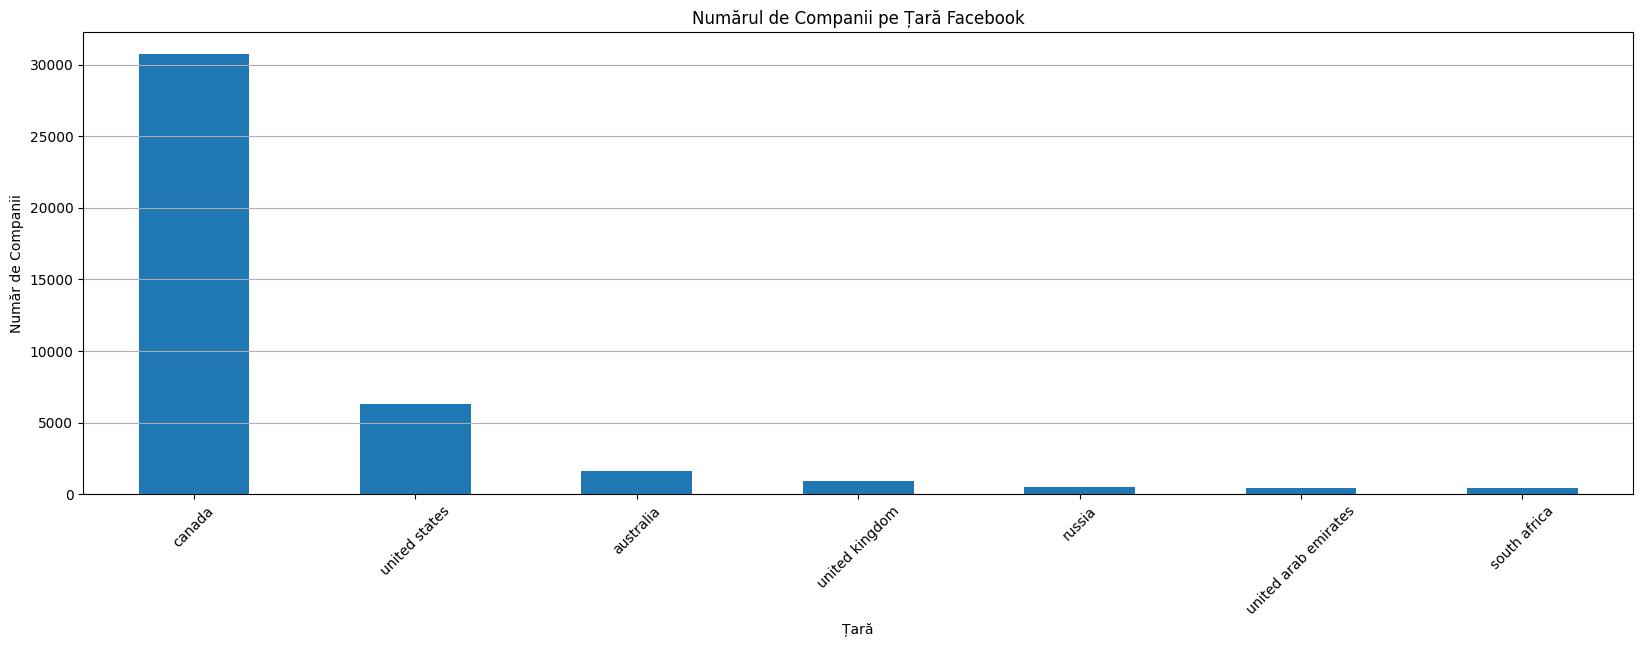

In [17]:
# Crearea plotului
plt.figure(figsize=(20, 6))
country_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Țară Facebook')
plt.xlabel('Țară')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [18]:
# df1.loc[df1.duplicated(subset=['name'])]

In [19]:
# df1 = df1.rename({'name':'company_name', 'categories':'category'})

In [20]:
df1 = df1.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [21]:
def clean_name(name):
    # Verifică dacă name este un string
    if not isinstance(name, str):
        return ''  # Sau returnează None sau orice altceva preferi

    # Elimină numerele și caracterele speciale
    name = re.sub(r'[^a-zA-Zàâçéèêëîïôûùüÿñæœ&\s]', '', name)
    
    # Înlocuiește & cu and
    name = name.replace('&', 'and')
    
    # Elimină sufixele
    name = re.sub(r'\b(itd|co|company|ltd|inc)\b', '', name, flags=re.IGNORECASE)
    
    # Curăță spațiile în exces
    name = name.strip()
    
    return name

In [22]:
df1['name'] = df1['name'].apply(clean_name)

In [23]:
def clean_address(address):
    if isinstance(address, str):  # Verifică dacă este string
        # Păstrează doar litere și cifre (fără alte caractere speciale)
        address = re.sub(r'[^a-zA-Z0-9\s]', '', address)
        # Curăță spațiile în exces
        return address.strip()
    return address  # Returnează valoarea originală dacă nu este string

In [24]:
df1['address'] = df1['address'].apply(clean_address)

In [25]:
df1['phone'] = df1['phone'].astype(str)

In [26]:
def clean_phone(phone):
    if isinstance(phone, str):  # Verifică dacă este string
        # Extrage doar cifrele
        digits = re.sub(r'\D', '', phone)
        
        # Verifică dacă numărul are minim 11 cifre
        if len(digits) < 10:
            return ''  # Returnează spațiu gol pentru numere mai mici de 11 cifre

        # Formatează numărul
        formatted_phone = f'+{digits[:2]} {digits[2:5]}-{digits[5:8]}-{digits[8:]}'
        return formatted_phone
    return phone  # Returnează valoarea originală dacă nu este string

In [27]:
df1['phone'] = df1['phone'].apply(clean_phone)

In [28]:
df1 = df1.fillna('')

In [29]:
# df1['address_text'] = df1[['country_name', 'country_code', 'region_name', 'city', 'zip_code']].agg(', '.join, axis=1) 

In [30]:
df1 = df1[['domain', 'address', 'categories', 'country_name', 'country_code', 'region_name', 'city', 'zip_code', 'name', 'phone']]

In [31]:
df1.head(10)

,domain,address,categories,country_name,country_code,region_name,city,zip_code,name,phone
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080
5,collins-cc.edu,,other schools|high schools|community center|ad...,,,,,,collins career technical center,
6,dovercheese.com,307 main street n0a 1n0 port dover on canada o...,,canada,ca,ontario,port dover,n0a 1n0,the dover cheese shop,
7,alphascientific.ca,8623 granville street unit 143 v6p 5a2 vancouv...,medical supply manufacturers,canada,ca,british columbia,vancouver,v6p 5a2,alpha scientific repair services,+16 046-903-3800
8,modernmama.com,,book publisher,,,,,,modern mama edmonton,
9,unitysodfarm.com,2989 unity road k0h 1m0 kingston on canada ont...,agriculture & farm associations|garden equipme...,,ca,,,,unity sod farm,+16 133-893-4370


In [32]:
procentdf1 = df1.nunique() / len(df1) * 100

In [33]:
print(procentdf1)

domain          100.000000
address          81.997410
categories       14.657568
country_name      0.170234
country_code      0.190604
region_name       0.992303
city              9.205721
zip_code         37.770082
name             97.686566
phone            64.403672
dtype: float64


In [34]:
# verificare valori nevide
df1.apply(lambda col: (col != '').sum())

domain          68729
address         56680
categories      54593
country_name    44865
country_code    57189
region_name     44562
city            44567
zip_code        35623
name            67367
phone           44340
dtype: int64

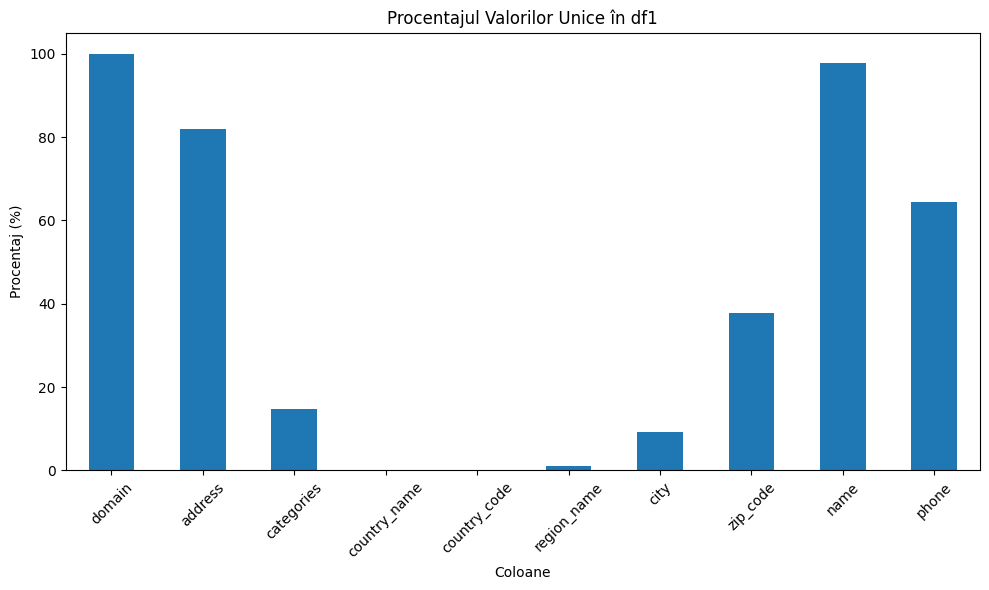

In [35]:
# Calculează procentajul valorilor unice pentru df1
unique_percentages = df1.nunique() / len(df1) * 100

# Afișează graficul
unique_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Procentajul Valorilor Unice în df1')
plt.ylabel('Procentaj (%)')
plt.xlabel('Coloane')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df1.shape

(68729, 10)

In [37]:
df2 = pd.read_csv('google_dataset.csv', on_bad_lines = 'skip', low_memory=False)

In [38]:
df2.head(10)

,address,category,city,country_code,country_name,name,phone,phone_country_code,raw_address,raw_phone,region_code,region_name,text,zip_code,domain
0,"28 Central Coast Hwy, West Gosford NSW 2250, A...",Fabric-Based Home Goods,gosford,au,australia,Spotlight West Gosford,+61243355946,au,"West Gosford NSW, Australia",+61 2 4335 5946,nsw,new south wales,"4.1 (766) · Craft store West Gosford NSW, Aust...",2250,spotlightstores.com
1,"400 Scott St, St. Catharines, ON L2M 3W2, Canada",Book Stores,st. catharines,ca,canada,Heritage Christian Book Store,+19059374553,ca,400 Scott St · In Grantham Plaza,+1 905-937-4553,on,ontario,4.7 (100) · Book store 400 Scott St · In Grant...,l2m 3w2,bookmanager.com
2,"191 Pleasant St, Yarmouth, NS B5A 2J9, Canada",Other Building Material Retailers,yarmouth,ca,canada,Pleasant Timber Mart,+19027429181,ca,"7+ years in business · Yarmouth, NS, Canada",+1 902-742-9181,ns,nova scotia,4.7 (40) · Building materials store 7+ years i...,b5a 2j9,timbermart.ca
3,"11040 Santa Monica Blvd Suite 370, Los Angeles...",Plastic Surgery Clinics,los angeles,us,united states,Skin Specifics Medical Spa West LA,+18184268353,us,7+ years in business · 11040 Santa Monica Blvd...,+1 818-426-8353,ca,california,4.3 (15) · Medical spa 7+ years in business · ...,90025,linktr.ee
4,NaN,Catering & Delivery,NaN,NaN,NaN,Lakay express,NaN,NaN,NaN,NaN,NaN,NaN,5.0 (1) · Mobile caterer Open ⋅ Closes 9PM,NaN,linktr.ee
5,"Ferndale, MI, United States",Pubs & Bars,ferndale,us,united states,B. Nektar Meadery - Taproom & Headquarters,+13137446323,us,"Ferndale, MI, United States",+1 313-744-6323,mi,michigan,"4.8 (296) · $$ · Bar Ferndale, MI, United Stat...",NaN,linktr.ee
6,"321 Kent St, Sydney NSW 2000, Australia","Insurance - Agents, Carriers & Brokers",sydney,au,australia,icare NSW,NaN,NaN,"Sydney NSW, Australia",NaN,nsw,new south wales,"2.3 (187) · Insurance company Sydney NSW, Aust...",2000,icare.nsw.gov.au
7,"55 S Cleveland Ave, Westerville, OH 43081",Preschools & Kindergartens,westerville,us,united states,South Cleveland Avenue KinderCare,+16148990026,NaN,"7+ years in business · Westerville, OH",(614) 899-0026,oh,ohio,3.6 (20) · Preschool 7+ years in business · We...,43081,kindercare.com
8,"4050 S Torrey Pines Dr, Las Vegas, NV 89103, U...",Preschools & Kindergartens,las vegas,us,united states,Torrey Pines KinderCare,+17023670822,us,"7+ years in business · Las Vegas, NV, United S...",+1 702-367-0822,nv,nevada,3.8 (11) · Preschool 7+ years in business · La...,89103,kindercare.com
9,"7+ years in business · St Paul, MN, United States",Preschools & Kindergartens,NaN,us,NaN,Meadowlands KinderCare,+16514296316,us,"7+ years in business · St Paul, MN, United States",(651) 429-6316,NaN,NaN,4.8 (9) · Kindergarten 1000 Meadowlands Dr Clo...,NaN,kindercare.com


In [39]:
df2.isna().sum()/ len(df1) * 100

address                37.262291
category               74.296149
city                   65.075878
country_code           75.025099
country_name           65.023498
name                    0.046560
phone                  46.757555
phone_country_code    164.153414
raw_address            64.042835
raw_phone              40.664057
region_code            65.294126
region_name            65.286851
text                    5.112834
zip_code              118.260123
domain                  0.002910
dtype: float64

In [40]:
verificare_null_coloane = df2[['address', 'category', 'phone']].isna().all(axis=1).sum()

In [41]:
print(verificare_null_coloane)

2553


In [42]:
df2.shape

(346925, 15)

In [43]:
# vom afisa in dataframe numai valorile care au valori in address, categories, phone, invers lui verificare_null_coloane
df2 = df2[~df2[['address', 'category', 'phone']].isna().all(axis=1)] 

In [44]:
df2.shape

(344372, 15)

In [45]:
df2 = df2.fillna('')

In [46]:
df2 = df2.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [47]:
df2['name'] = df2['name'].apply(clean_name)

In [48]:
df2['address'] = df2['address'].apply(clean_address)

In [49]:
df2['phone'] = df2['phone'].apply(clean_phone)

In [50]:
df2.head(5)

,address,category,city,country_code,country_name,name,phone,phone_country_code,raw_address,raw_phone,region_code,region_name,text,zip_code,domain
0,28 central coast hwy west gosford nsw 2250 aus...,fabric-based home goods,gosford,au,australia,spotlight west gosford,+61 243-355-946,au,"west gosford nsw, australia",+61 2 4335 5946,nsw,new south wales,"4.1 (766) · craft store west gosford nsw, aust...",2250,spotlightstores.com
1,400 scott st st catharines on l2m 3w2 canada,book stores,st. catharines,ca,canada,heritage christian book store,+19 059-374-553,ca,400 scott st · in grantham plaza,+1 905-937-4553,on,ontario,4.7 (100) · book store 400 scott st · in grant...,l2m 3w2,bookmanager.com
2,191 pleasant st yarmouth ns b5a 2j9 canada,other building material retailers,yarmouth,ca,canada,pleasant timber mart,+19 027-429-181,ca,"7+ years in business · yarmouth, ns, canada",+1 902-742-9181,ns,nova scotia,4.7 (40) · building materials store 7+ years i...,b5a 2j9,timbermart.ca
3,11040 santa monica blvd suite 370 los angeles ...,plastic surgery clinics,los angeles,us,united states,skin specifics medical spa west la,+18 184-268-353,us,7+ years in business · 11040 santa monica blvd...,+1 818-426-8353,ca,california,4.3 (15) · medical spa 7+ years in business · ...,90025,linktr.ee
4,,catering & delivery,,,,lakay express,,,,,,,5.0 (1) · mobile caterer open ⋅ closes 9pm,,linktr.ee


In [51]:
df2 = df2[['address','category','city','country_code','country_name','name','phone','region_name','zip_code','domain']]

In [52]:
df2.head()

,address,category,city,country_code,country_name,name,phone,region_name,zip_code,domain
0,28 central coast hwy west gosford nsw 2250 aus...,fabric-based home goods,gosford,au,australia,spotlight west gosford,+61 243-355-946,new south wales,2250,spotlightstores.com
1,400 scott st st catharines on l2m 3w2 canada,book stores,st. catharines,ca,canada,heritage christian book store,+19 059-374-553,ontario,l2m 3w2,bookmanager.com
2,191 pleasant st yarmouth ns b5a 2j9 canada,other building material retailers,yarmouth,ca,canada,pleasant timber mart,+19 027-429-181,nova scotia,b5a 2j9,timbermart.ca
3,11040 santa monica blvd suite 370 los angeles ...,plastic surgery clinics,los angeles,us,united states,skin specifics medical spa west la,+18 184-268-353,california,90025,linktr.ee
4,,catering & delivery,,,,lakay express,,,,linktr.ee


In [53]:
# df2['address_text'] = df2[['country_name', 'country_code', 'region_name', 'city', 'zip_code']].agg(', '.join, axis=1) 

In [54]:
df2 = df2[['domain','address','category','country_name', 'country_code', 'region_name', 'city', 'zip_code','name','phone']]

In [55]:
df2.head()

,domain,address,category,country_name,country_code,region_name,city,zip_code,name,phone
0,spotlightstores.com,28 central coast hwy west gosford nsw 2250 aus...,fabric-based home goods,australia,au,new south wales,gosford,2250,spotlight west gosford,+61 243-355-946
1,bookmanager.com,400 scott st st catharines on l2m 3w2 canada,book stores,canada,ca,ontario,st. catharines,l2m 3w2,heritage christian book store,+19 059-374-553
2,timbermart.ca,191 pleasant st yarmouth ns b5a 2j9 canada,other building material retailers,canada,ca,nova scotia,yarmouth,b5a 2j9,pleasant timber mart,+19 027-429-181
3,linktr.ee,11040 santa monica blvd suite 370 los angeles ...,plastic surgery clinics,united states,us,california,los angeles,90025,skin specifics medical spa west la,+18 184-268-353
4,linktr.ee,,catering & delivery,,,,,,lakay express,


In [56]:
procentdf2 = df2.nunique() / len(df2) * 100

In [57]:
print(procentdf2)

domain          20.296366
address         79.674886
category         0.136190
country_name     0.054592
country_code     0.062142
region_name      0.436447
city             6.407896
zip_code        29.241053
name            97.043604
phone           80.531809
dtype: float64


In [58]:
df2.apply(lambda col: (col != '').sum()) #nr de valori diferite de ''

domain          344370
address         321314
category        295862
country_name    302235
country_code    295360
region_name     302054
city            302199
zip_code        265646
name            343127
phone           314386
dtype: int64

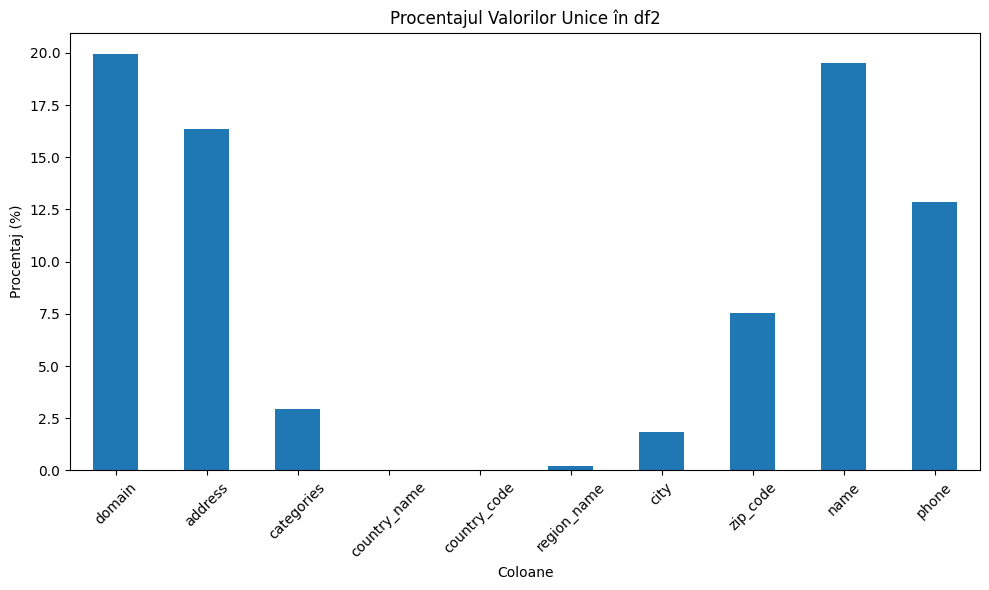

In [59]:
# Calculează procentajul valorilor unice pentru df2
unique_percentages = df1.nunique() / len(df2) * 100

# Afișează graficul
unique_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Procentajul Valorilor Unice în df2')
plt.ylabel('Procentaj (%)')
plt.xlabel('Coloane')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [60]:
df2.shape

(344372, 10)

In [61]:
verificare_null_coloane = df2[['address', 'category', 'phone']].isna().all(axis=1).sum()

In [62]:
print(verificare_null_coloane)

0


In [63]:
df1.head()

,domain,address,categories,country_name,country_code,region_name,city,zip_code,name,phone
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080


In [64]:
df2.head()

,domain,address,category,country_name,country_code,region_name,city,zip_code,name,phone
0,spotlightstores.com,28 central coast hwy west gosford nsw 2250 aus...,fabric-based home goods,australia,au,new south wales,gosford,2250,spotlight west gosford,+61 243-355-946
1,bookmanager.com,400 scott st st catharines on l2m 3w2 canada,book stores,canada,ca,ontario,st. catharines,l2m 3w2,heritage christian book store,+19 059-374-553
2,timbermart.ca,191 pleasant st yarmouth ns b5a 2j9 canada,other building material retailers,canada,ca,nova scotia,yarmouth,b5a 2j9,pleasant timber mart,+19 027-429-181
3,linktr.ee,11040 santa monica blvd suite 370 los angeles ...,plastic surgery clinics,united states,us,california,los angeles,90025,skin specifics medical spa west la,+18 184-268-353
4,linktr.ee,,catering & delivery,,,,,,lakay express,


In [65]:
country_counts = df2['country_name'].value_counts()

In [66]:
country_counts = country_counts[country_counts > 500]

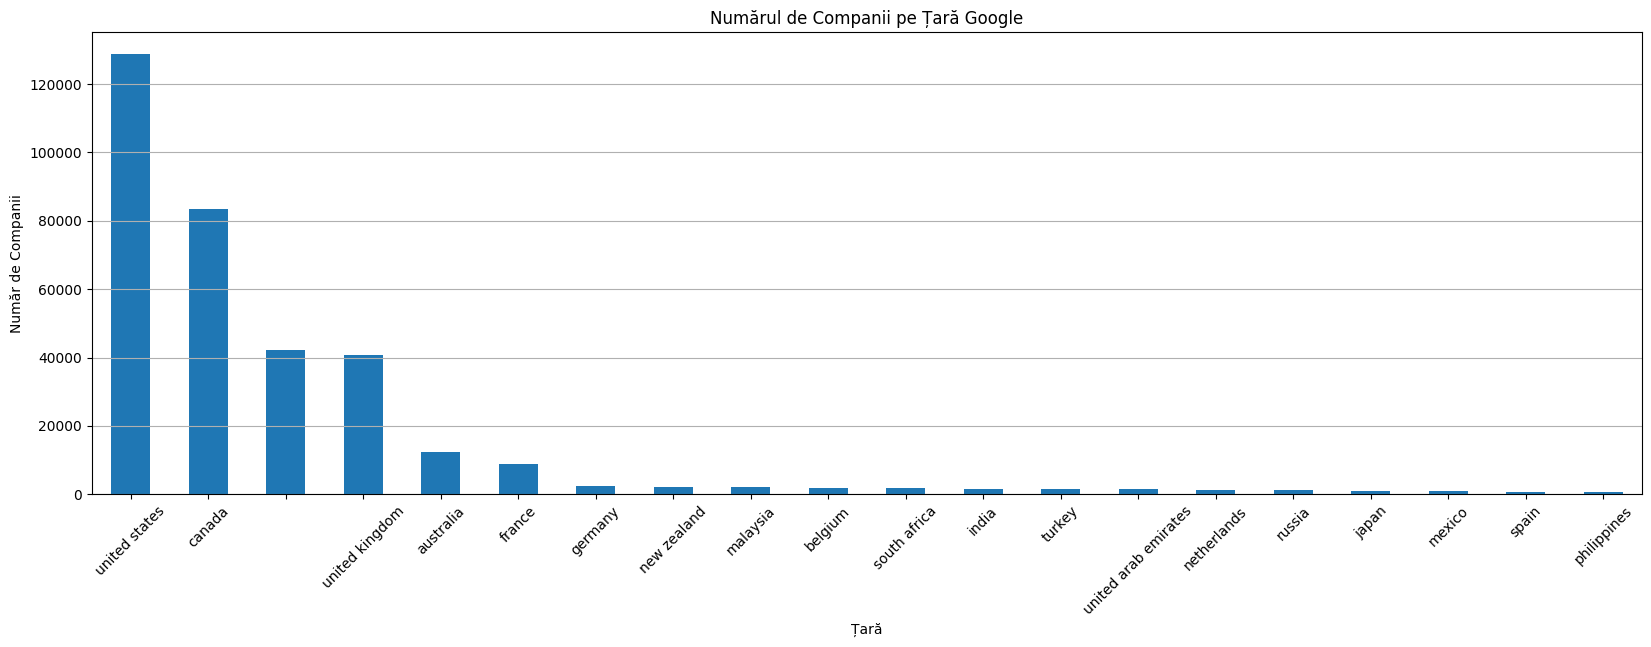

In [67]:
# Crearea plotului
plt.figure(figsize=(20, 6))
country_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Țară Google')
plt.xlabel('Țară')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [68]:
df1.rename(columns={'categories':'category', 'name':'company_name'}, inplace = True)

In [69]:
df2.rename(columns={'name':'company_name'}, inplace = True)

In [70]:
df1.head()

,domain,address,category,country_name,country_code,region_name,city,zip_code,company_name,phone
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080


In [71]:
df2.head()

,domain,address,category,country_name,country_code,region_name,city,zip_code,company_name,phone
0,spotlightstores.com,28 central coast hwy west gosford nsw 2250 aus...,fabric-based home goods,australia,au,new south wales,gosford,2250,spotlight west gosford,+61 243-355-946
1,bookmanager.com,400 scott st st catharines on l2m 3w2 canada,book stores,canada,ca,ontario,st. catharines,l2m 3w2,heritage christian book store,+19 059-374-553
2,timbermart.ca,191 pleasant st yarmouth ns b5a 2j9 canada,other building material retailers,canada,ca,nova scotia,yarmouth,b5a 2j9,pleasant timber mart,+19 027-429-181
3,linktr.ee,11040 santa monica blvd suite 370 los angeles ...,plastic surgery clinics,united states,us,california,los angeles,90025,skin specifics medical spa west la,+18 184-268-353
4,linktr.ee,,catering & delivery,,,,,,lakay express,


In [72]:
df12 = df1.merge(df2, how='inner', on='company_name')

In [73]:
df12.head()

,domain_x,address_x,category_x,country_name_x,country_code_x,region_name_x,city_x,zip_code_x,company_name,phone_x,domain_y,address_y,category_y,country_name_y,country_code_y,region_name_y,city_y,zip_code_y,phone_y
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,,euro-hygiene-34.fr,3 years in business calvisson france,pest services & agricultural chemicals,france,fr,occitanie,calvisson,,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400,lakesidehomeservices.ca,,appliance repair & maintenance,,ca,,,,+16 138-318-840
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,,rossiterboats.com,markdale on canada,boats & yachts dealers,canada,ca,ontario,markdale,,+15 199-861-203
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900,caa-architecture.com,the marine building 355 burrard st suite 180 v...,architects & architectural services,canada,ca,british columbia,vancouver,v6c 2g8,+16 046-873-390
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080,apexsurety.ca,4 donald st 3 winnipeg mb r3l 2t7 canada,"insurance - agents, carriers & brokers",canada,ca,manitoba,winnipeg,r3l 2t7,+12 045-602-508


In [74]:
def combine_columns(row, col_x, col_y):
    val_x = row[col_x] if pd.notnull(row[col_x]) else ''
    val_y = row[col_y] if pd.notnull(row[col_y]) else ''
    
    # Dacă ambele sunt goale, returnăm un string gol
    if not val_x and not val_y:
        return ''

    # Dacă unul din ele este gol, returnăm cealaltă valoare
    if not val_x:
        return val_y
    if not val_y:
        return val_x

    # Împărțim numerele de telefon în liste
    phone_numbers_x = [num.strip() for num in val_x.split(',')] if val_x else []
    phone_numbers_y = [num.strip() for num in val_y.split(',')] if val_y else []

    # Creăm un set pentru a păstra numerele finale fără duplicate
    final_numbers = set()

    # Comparăm fiecare număr din lista x cu cele din lista y
    for num_x in phone_numbers_x:
        similar_found = False
        
        for num_y in phone_numbers_y:
            if fuzz.ratio(num_x, num_y) >= 80:  # dacă se potrivesc
                # Păstrează cea mai lungă variantă
                final_numbers.add(num_x if len(num_x) >= len(num_y) else num_y)
                similar_found = True
                break  # Ies din buclă după ce am găsit o potrivire

        # Dacă nu s-a găsit o potrivire, păstrăm numărul original
        if not similar_found:
            final_numbers.add(num_x)

    # Adăugăm numerele din y care nu au fost deja adăugate
    for num_y in phone_numbers_y:
        if all(fuzz.ratio(num_y, num_x) < 80 for num_x in phone_numbers_x):
            final_numbers.add(num_y)

    # Returnăm numerele combinate, separate prin virgulă, fără ghilimele
    return ', '.join(final_numbers)

In [75]:
df12['category_combined'] = df12.apply(lambda row: combine_columns(row, 'category_x', 'category_y'), axis=1)

In [76]:
df12.head()

,domain_x,address_x,category_x,country_name_x,country_code_x,region_name_x,city_x,zip_code_x,company_name,phone_x,domain_y,address_y,category_y,country_name_y,country_code_y,region_name_y,city_y,zip_code_y,phone_y,category_combined
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,,euro-hygiene-34.fr,3 years in business calvisson france,pest services & agricultural chemicals,france,fr,occitanie,calvisson,,,pest services & agricultural chemicals
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400,lakesidehomeservices.ca,,appliance repair & maintenance,,ca,,,,+16 138-318-840,appliance repair & maintenance|home builders &...
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,,rossiterboats.com,markdale on canada,boats & yachts dealers,canada,ca,ontario,markdale,,+15 199-861-203,"boats & yachts dealers|boat tours & cruises, b..."
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900,caa-architecture.com,the marine building 355 burrard st suite 180 v...,architects & architectural services,canada,ca,british columbia,vancouver,v6c 2g8,+16 046-873-390,architects & architectural services|other engi...
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080,apexsurety.ca,4 donald st 3 winnipeg mb r3l 2t7 canada,"insurance - agents, carriers & brokers",canada,ca,manitoba,winnipeg,r3l 2t7,+12 045-602-508,"insurance - agents, carriers & brokers"


In [77]:
df12['phone_combined'] = df12.apply(lambda row: combine_columns(row, 'phone_x', 'phone_y'), axis=1)

In [78]:
df12.head(130)

,domain_x,address_x,category_x,country_name_x,country_code_x,region_name_x,city_x,zip_code_x,company_name,phone_x,...,address_y,category_y,country_name_y,country_code_y,region_name_y,city_y,zip_code_y,phone_y,category_combined,phone_combined
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,,...,3 years in business calvisson france,pest services & agricultural chemicals,france,fr,occitanie,calvisson,,,pest services & agricultural chemicals,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400,...,,appliance repair & maintenance,,ca,,,,+16 138-318-840,appliance repair & maintenance|home builders &...,+16 138-318-8400
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,,...,markdale on canada,boats & yachts dealers,canada,ca,ontario,markdale,,+15 199-861-203,"boats & yachts dealers|boat tours & cruises, b...",+15 199-861-203
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900,...,the marine building 355 burrard st suite 180 v...,architects & architectural services,canada,ca,british columbia,vancouver,v6c 2g8,+16 046-873-390,architects & architectural services|other engi...,+16 046-873-3900
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080,...,4 donald st 3 winnipeg mb r3l 2t7 canada,"insurance - agents, carriers & brokers",canada,ca,manitoba,winnipeg,r3l 2t7,+12 045-602-508,"insurance - agents, carriers & brokers",+12 045-602-5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,mtt.ru,22 109147 moscow russia moscow,business consulting|telecommunications,russia,ru,moscow,moscow,109147,,,...,815 kaohsiung city dashe district dashe road 387,,taiwan,,kaohsiung,kaohsiung city,815,+88 673-560-727,business consulting|telecommunications,+88 673-560-727
126,mtt.ru,22 109147 moscow russia moscow,business consulting|telecommunications,russia,ru,moscow,moscow,109147,,,...,sakaimachihigashi 2 chome 38,,,,,,,,business consulting|telecommunications,
127,mtt.ru,22 109147 moscow russia moscow,business consulting|telecommunications,russia,ru,moscow,moscow,109147,,,...,,,,th,,,,+66 654-644-477,business consulting|telecommunications,+66 654-644-477
128,mtt.ru,22 109147 moscow russia moscow,business consulting|telecommunications,russia,ru,moscow,moscow,109147,,,...,12740 trites rd 54 richmond bc v6x 1y1 canada,sailing club,canada,ca,british columbia,richmond,v6x 1y1,+17 789-190-723,"sailing club, business consulting|telecommunic...",+17 789-190-723


In [79]:
df12.shape

(1740599, 21)

In [80]:
num_different_domains = len(df12[df12['domain_x'] != df12['domain_y']])

In [81]:
print(num_different_domains)

1696639


In [82]:
print((df12['company_name'] == '').sum())

1695690


In [83]:
df12 = df12[df12['company_name'] != '']

In [84]:
df12.shape

(44909, 21)

In [85]:
df12.head(10)

,domain_x,address_x,category_x,country_name_x,country_code_x,region_name_x,city_x,zip_code_x,company_name,phone_x,...,address_y,category_y,country_name_y,country_code_y,region_name_y,city_y,zip_code_y,phone_y,category_combined,phone_combined
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,,...,3 years in business calvisson france,pest services & agricultural chemicals,france,fr,occitanie,calvisson,,,pest services & agricultural chemicals,
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400,...,,appliance repair & maintenance,,ca,,,,+16 138-318-840,appliance repair & maintenance|home builders &...,+16 138-318-8400
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,,...,markdale on canada,boats & yachts dealers,canada,ca,ontario,markdale,,+15 199-861-203,"boats & yachts dealers|boat tours & cruises, b...",+15 199-861-203
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900,...,the marine building 355 burrard st suite 180 v...,architects & architectural services,canada,ca,british columbia,vancouver,v6c 2g8,+16 046-873-390,architects & architectural services|other engi...,+16 046-873-3900
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080,...,4 donald st 3 winnipeg mb r3l 2t7 canada,"insurance - agents, carriers & brokers",canada,ca,manitoba,winnipeg,r3l 2t7,+12 045-602-508,"insurance - agents, carriers & brokers",+12 045-602-5080
5,collins-cc.edu,,other schools|high schools|community center|ad...,,,,,,collins career technical center,,...,chesapeake oh united states,employment agencies & hr consulting,,us,,,,+17 408-676-641,"employment agencies & hr consulting, other sch...",+17 408-676-641
6,dovercheese.com,307 main street n0a 1n0 port dover on canada o...,,canada,ca,ontario,port dover,n0a 1n0,the dover cheese shop,,...,307 main st port dover on n0a 1n0 canada,dairy products - farms & stores,canada,ca,ontario,port dover,n0a 1n0,+15 197-181-201,dairy products - farms & stores,+15 197-181-201
7,alphascientific.ca,8623 granville street unit 143 v6p 5a2 vancouv...,medical supply manufacturers,canada,ca,british columbia,vancouver,v6p 5a2,alpha scientific repair services,+16 046-903-3800,...,8623 granville st 143 vancouver bc v6p 5a3 canada,medical supply manufacturers,canada,ca,british columbia,vancouver,v6p 5a3,+16 046-903-380,medical supply manufacturers,+16 046-903-3800
8,unitysodfarm.com,2989 unity road k0h 1m0 kingston on canada ont...,agriculture & farm associations|garden equipme...,,ca,,,,unity sod farm,+16 133-893-4370,...,elginburg on canada,farms & agriculture production,,ca,,,,+16 133-893-437,agriculture & farm associations|garden equipme...,+16 133-893-4370
9,healthability.org.au,917 main road 3095 eltham vic australia victoria,security guards & patrol services|dentists & d...,australia,au,victoria,eltham,victoria,healthability,,...,917 main rd eltham vic 3095 australia,clinics - surgeons & physicians,australia,au,victoria,eltham,3095,+61 394-309-100,security guards & patrol services|dentists & d...,+61 394-309-100


In [86]:
# Aplică funcțiile pentru fiecare coloană în parte
df12['country_name'] = df12.apply(lambda row: combine_columns(row, 'country_name_x', 'country_name_y'), axis=1)
df12['country_code'] = df12.apply(lambda row: combine_columns(row, 'country_code_x', 'country_code_y'), axis=1)
df12['region_name'] = df12.apply(lambda row: combine_columns(row, 'region_name_x', 'region_name_y'), axis=1)
df12['city'] = df12.apply(lambda row: combine_columns(row, 'city_x', 'city_y'), axis=1)
df12['zip_code'] = df12.apply(lambda row: combine_columns(row, 'zip_code_x', 'zip_code_y'), axis=1)

In [87]:
df12.head(41120)

,domain_x,address_x,category_x,country_name_x,country_code_x,region_name_x,city_x,zip_code_x,company_name,phone_x,...,city_y,zip_code_y,phone_y,category_combined,phone_combined,country_name,country_code,region_name,city,zip_code
0,euro-hygiene-34.fr,134 rue entrepreneurs za du vign 30420 calviss...,,france,fr,occitanie,calvisson,30420,euro hygiène,,...,calvisson,,,pest services & agricultural chemicals,,france,fr,occitanie,calvisson,30420
1,lakesidehomeservices.ca,,appliance repair & maintenance|home builders &...,,ca,,,,lakeside home services,+16 138-318-8400,...,,,+16 138-318-840,appliance repair & maintenance|home builders &...,+16 138-318-8400,,ca,,,
2,rossiterboats.com,,boats & yachts dealers|boat tours & cruises,,,,,,rossiter boats,,...,markdale,,+15 199-861-203,"boats & yachts dealers|boat tours & cruises, b...",+15 199-861-203,canada,ca,ontario,markdale,
3,caa-architecture.com,601 cordova st w 270 v6b 1g1 vancouver bc can...,architects & architectural services|other engi...,canada,ca,british columbia,vancouver,v6b 1g1,chandler associates architecture,+16 046-873-3900,...,vancouver,v6c 2g8,+16 046-873-390,architects & architectural services|other engi...,+16 046-873-3900,canada,ca,british columbia,vancouver,"v6b 1g1, v6c 2g8"
4,apexsurety.ca,unit 3 4 donald street r3l 2t7 winnipeg mb ca...,,canada,ca,manitoba,winnipeg,r3l 2t7,apex surety and insurance,+12 045-602-5080,...,winnipeg,r3l 2t7,+12 045-602-508,"insurance - agents, carriers & brokers",+12 045-602-5080,canada,ca,manitoba,winnipeg,r3l 2t7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609815,greatpyramid.ca,9 browning court unit 2 l7e 1g8 bolton on cana...,auto glass stores|other engineering services|h...,canada,ca,ontario,bolton,l7e 1g8,great pyramid glass and mirror,+19 057-380-9880,...,bolton,l7e 1g8,+19 057-380-988,auto glass stores|other engineering services|h...,+19 057-380-9880,canada,ca,ontario,bolton,l7e 1g8
1609816,hindssafety.ca,elgin meadows view se calgary ab canada alberta,business consulting|ambulances & rescue squads,canada,ca,alberta,calgary,,hinds safety,,...,,,+14 034-087-233,"work clothing & protection equipment, business...",+14 034-087-233,canada,ca,alberta,calgary,
1611062,total.fr,3387 avenue de prades 66000 perpignan france l...,oil & gas - extraction & distribution,france,fr,occitanie,perpignan,66000,total,,...,castelnau-magnoac,65230,+33 562-998-009,oil & gas - extraction & distribution,+33 562-998-009,france,fr,occitanie,"castelnau-magnoac, perpignan","66000, 65230"
1611063,total.fr,3387 avenue de prades 66000 perpignan france l...,oil & gas - extraction & distribution,france,fr,occitanie,perpignan,66000,total,,...,villers-bretonneux,80800,+33 471-775-007,oil & gas - extraction & distribution,+33 471-775-007,france,fr,"occitanie, hauts-de-france","villers-bretonneux, perpignan","66000, 80800"


In [88]:
num_different_domains = len(df12[df12['domain_x'] != df12['domain_y']])

In [89]:
print(num_different_domains)

1450


In [90]:
df12.shape

(44909, 26)

In [91]:
df12 = df12[['domain_x','domain_y','company_name','category_combined','country_name', 'country_code', 'region_name', 'city', 'zip_code','phone_combined']]

In [92]:
df12[df12['domain_x'] != df12['domain_y']]

,domain_x,domain_y,company_name,category_combined,country_name,country_code,region_name,city,zip_code,phone_combined
3910,stpetersschoolwaldorf.org,stpeterrc.org,st peters school,churches & religious organizations|community c...,united states,us,new york,lewiston,14092,+17 167-544-470
3911,stpetersschoolwaldorf.org,st-peters-school.org,st peters school,churches & religious organizations|community c...,united states,us,pennsylvania,philadelphia,19147,+12 159-253-963
3947,columbia4.org,columbiaschools.org,columbia school district,"community center|elementary schools, schools",united states,us,mississippi,columbia,39429,+16 017-362-366
5195,joneslanglasalle.co.jp,jll.com,jll,"real estate - agents & managers, property mana...",united states,"jp, us",michigan,royal oak,48067,"+12 485-813-300, +81 355-019-2000"
7713,cafe303.ca,facebook.com,café,coffee & tea shops,"canada, united kingdom","ca, gb","saskatchewan, england","saskatoon, stockton-on-tees","ts18 4ar, 100","+44 164-260-3669, +13 063-742-2330"
...,...,...,...,...,...,...,...,...,...,...
1734226,bigsalts.ru,facebook.com,spa,clinics - surgeons & physicians|spa & wellness...,"united states, russia","us, ru","kentucky, yaroslavskaya oblast'","nekrasovskoye, louisville","40206, 152260","+74 852-595-7470, +15 023-031-012"
1734227,bigsalts.ru,schedulicity.com,spa,clinics - surgeons & physicians|spa & wellness...,"united states, russia","us, ru","wisconsin, yaroslavskaya oblast'","hales corners, nekrasovskoye","152260, 53130","+74 852-595-7470, +14 143-132-075"
1735523,81catering.com,uwm.edu,catering,catering & delivery,"canada, united states",ca,"ontario, wisconsin","mississauga, milwaukee","l5n 8g6, 53211","+14 142-293-733, +19 058-128-1810"
1738041,circlekrussia.ru,circlek.ie,circle k,oil & gas - extraction & distribution|auto ser...,ireland,ie,munster,cork,p31,+35 366-712-4782


In [93]:
repeated_counts = df12['company_name'].value_counts()

In [94]:
print(repeated_counts)

company_name
studio                              185
salon                                84
aig                                  28
shell                                27
m                                    24
                                   ... 
cole haan japan                       1
cadex electronics                     1
coastline catering                    1
hardin county water district no       1
chandler associates architecture      1
Name: count, Length: 41899, dtype: int64


In [95]:
company_name_duplicates = df12.duplicated('company_name', keep=False).sum()

In [96]:
print(company_name_duplicates)

4827


In [97]:
domain_duplicates = df12.duplicated('domain_x', keep=False).sum()

In [98]:
print(domain_duplicates)

4719


In [99]:
domain_duplicates = df12.duplicated('domain_y', keep=False).sum()

In [100]:
print(domain_duplicates)

4444


In [101]:
def combine_unique_values(series):
    return ', '.join(series.dropna().unique())

In [102]:
df12 = df12.groupby('company_name').agg({
    'domain_x': combine_unique_values,
    'domain_y': combine_unique_values,
    'category_combined': combine_unique_values,
    'country_name': combine_unique_values,
    'country_code': combine_unique_values,
    'region_name': combine_unique_values,
    'city': combine_unique_values,
    'zip_code': combine_unique_values,
    'phone_combined': combine_unique_values
}).reset_index()

In [103]:
df12.head(41129)

,company_name,domain_x,domain_y,category_combined,country_name,country_code,region_name,city,zip_code,phone_combined
0,a siding and windows niagara,a1sidingandwindowsniagara.ca,a1sidingandwindowsniagara.ca,industrial machinery & supplies|general contra...,canada,ca,ontario,"hamilton, stoney creek",l8e 2k8,+19 056-625-7570
1,a abendschein immobilien,a1-abendschein.de,a1-abendschein.de,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,landau in der pfalz,76829,+49 634-191-80300
2,a and a management,aa-management.com,aa-management.com,accounting & bookkeeping services|business con...,united states,us,michigan,southfield,48033,+12 483-592-3070
3,a and a power tool repair,powertoolrepair.ca,powertoolrepair.ca,die casting & tool manufacturing,canada,ca,ontario,st. catharines,l2n 1k8,+19 056-464-8810
4,a and b denture clinic,abdentureclinic.ca,abdentureclinic.ca,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424"
...,...,...,...,...,...,...,...,...,...,...
41124,wing station,wingstation.ca,wingstation.ca,restaurants,canada,ca,ontario,toronto,,+14 162-933-555
41125,wingmen suits,wingmensuits.com,wingmensuits.com,clothing stores,canada,ca,ontario,richmond hill,"l4b 2p3, l4b 1h4",+14 164-178-8220
41126,wingra school,wingraschool.org,wingraschool.org,,united states,us,wisconsin,madison,53711,+16 082-382-5250
41127,wings travel management,wings.travel,wings.travel,airline companies|travel agencies|travel agenc...,united states,za,western cape,sutton,sw11 2ln,+65 673-272-22


In [104]:
df12.shape

(41899, 10)

In [105]:
df12.duplicated('company_name', keep=False).sum()

np.int64(0)

In [106]:
# df12.to_csv('df12_output.csv', index=False)

In [107]:
domain_duplicates = df12.duplicated('domain_x', keep=False).sum()

In [108]:
print(domain_duplicates)

0


In [109]:
country_counts = df12['country_name'].value_counts()

In [110]:
country_counts = country_counts[country_counts > 500] # verificam tarile cu > 500 companii/tara

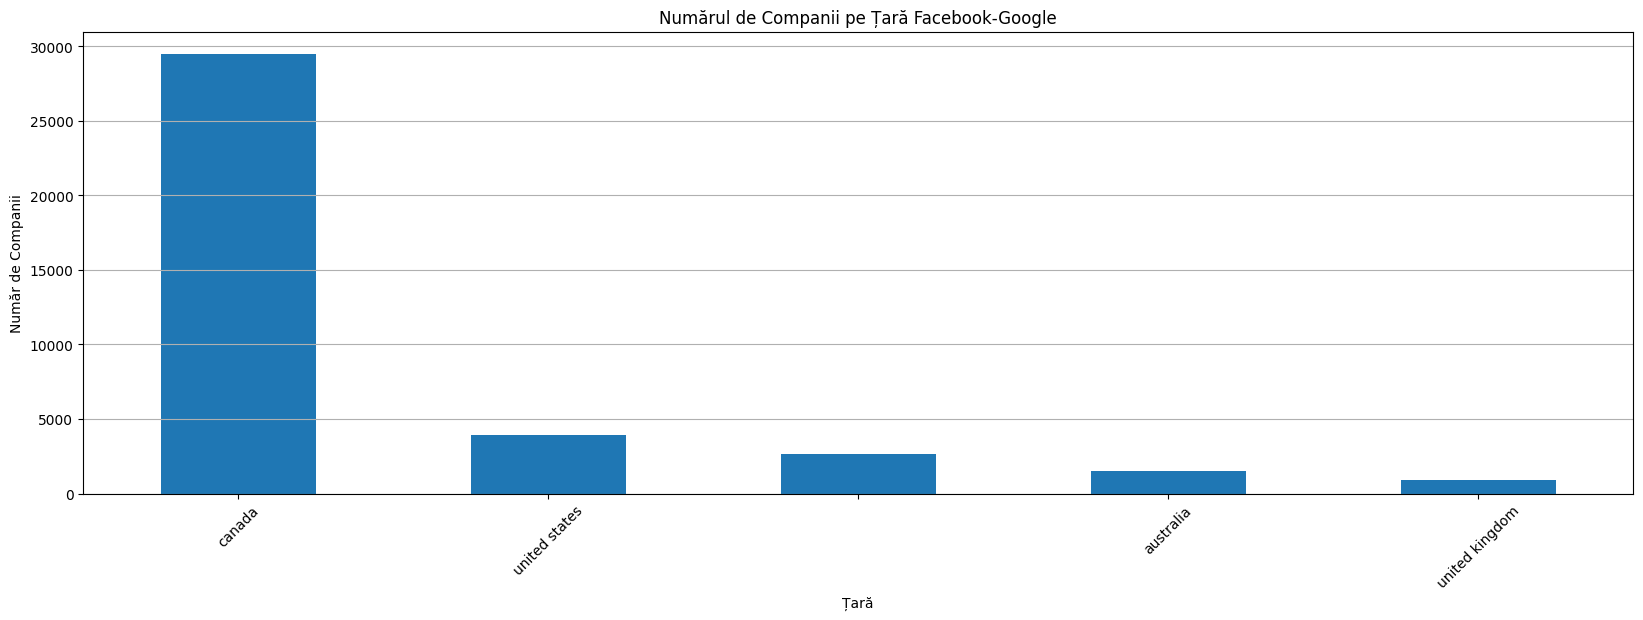

In [111]:
# Crearea plotului
plt.figure(figsize=(20, 6))
country_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Țară Facebook-Google')
plt.xlabel('Țară')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [112]:
df3 = pd.read_csv('website_dataset.csv', on_bad_lines = 'skip', low_memory=False, delimiter = ';')

In [113]:
df3.shape

(72018, 11)

In [114]:
df3.head()

,root_domain,domain_suffix,language,legal_name,main_city,main_country,main_region,phone,site_name,tld,s_category
0,converterman.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,clothesencounter.ca,ca,en,NaN,cardigan,canada,prince edward island,13066937766,Clothes Encounter,ca,Shoes & Other Footwear Stores
2,investa.com.au,com.au,en,Investa Wholesale Funds Management Limited,brisbane,australia,queensland,61282269300,Investa Property Group,au,Real Estate Developers
3,timminsgarage.com,com,en,Timmins Garage Inc.,timmins,canada,ontario,18775896640,Timmins Garage,com,Automobile Dealers & Manufacturers
4,destinate.ca,ca,en,Destinate Group Ltd.,NaN,Canada,NaN,NaN,Destinate Group,ca,Business Consulting


In [115]:
df3.isna().sum()/ len(df3) * 100

root_domain       0.001389
domain_suffix     0.163848
language          7.209309
legal_name       55.581938
main_city        15.346163
main_country      9.926685
main_region      15.391985
phone             8.856119
site_name         4.587742
tld               0.362409
s_category        1.921742
dtype: float64

In [116]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72018 entries, 0 to 72017
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   root_domain    72017 non-null  object
 1   domain_suffix  71900 non-null  object
 2   language       66826 non-null  object
 3   legal_name     31989 non-null  object
 4   main_city      60966 non-null  object
 5   main_country   64869 non-null  object
 6   main_region    60933 non-null  object
 7   phone          65640 non-null  object
 8   site_name      68714 non-null  object
 9   tld            71757 non-null  object
 10  s_category     70634 non-null  object
dtypes: object(11)
memory usage: 6.0+ MB


In [117]:
df3['site_name'] = df3['site_name'].apply(clean_name)

In [118]:
df3['phone'] = df3['phone'].apply(clean_phone)

In [119]:
df3 = df3[['root_domain','site_name', 'main_country', 'main_region', 'main_city', 'phone']]

In [120]:
df3 = df3.fillna('')

In [121]:
df3 = df3.apply(lambda x: x.str.strip().str.lower() if x.dtype == "object" else x)

In [122]:
df3.head()

,root_domain,site_name,main_country,main_region,main_city,phone
0,converterman.com,,,,,
1,clothesencounter.ca,clothes encounter,canada,prince edward island,cardigan,+13 066-937-766
2,investa.com.au,investa property group,australia,queensland,brisbane,+61 282-269-300
3,timminsgarage.com,timmins garage,canada,ontario,timmins,+18 775-896-640
4,destinate.ca,destinate group,canada,,,


In [123]:
country_counts = df3['main_country'].value_counts()

In [124]:
country_counts = country_counts[country_counts > 500] # verificam tarile cu > 500 companii/tara

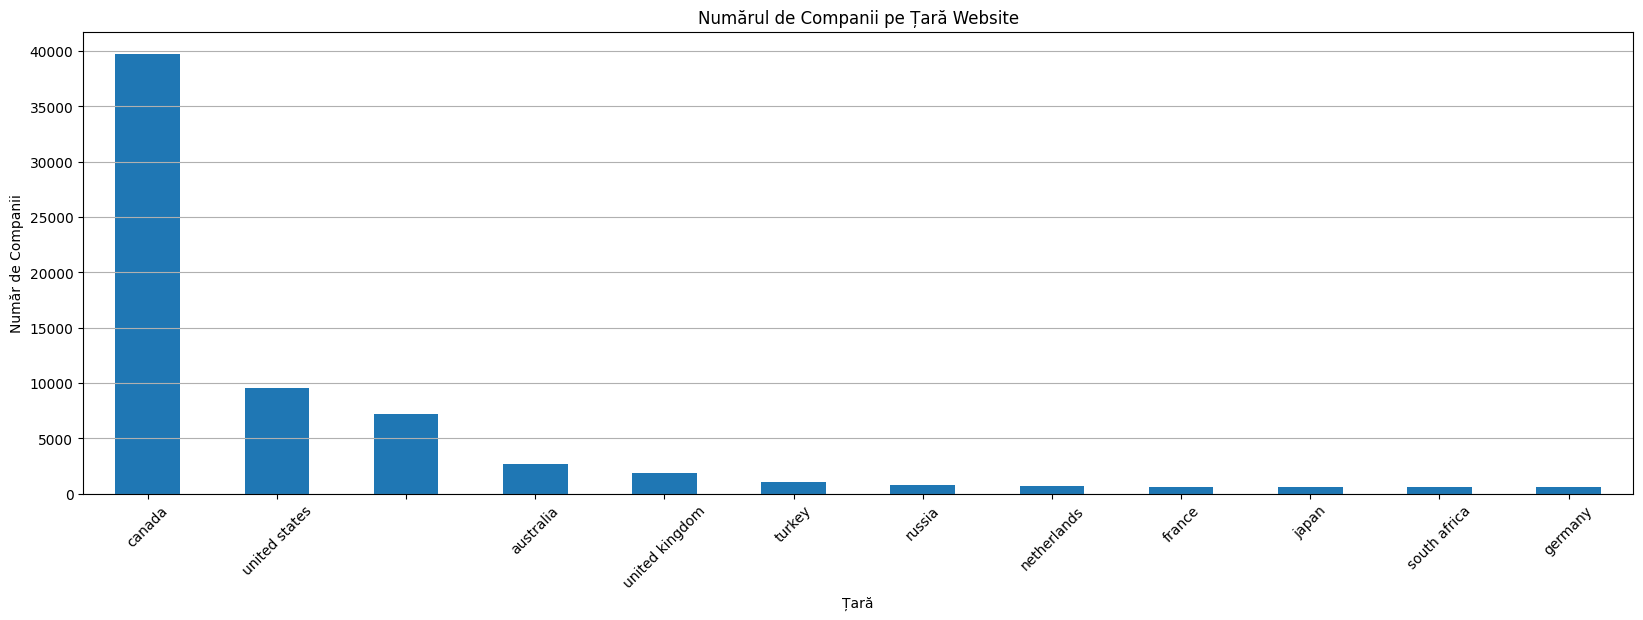

In [125]:
# Crearea plotului
plt.figure(figsize=(20, 6))
country_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Țară Website')
plt.xlabel('Țară')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [126]:
df3.rename(columns={'root_domain':'domain','site_name':'company_name', 'main_country':'country','main_region':'region', 'main_city':'city'}, inplace = True)

In [127]:
df3.head()

,domain,company_name,country,region,city,phone
0,converterman.com,,,,,
1,clothesencounter.ca,clothes encounter,canada,prince edward island,cardigan,+13 066-937-766
2,investa.com.au,investa property group,australia,queensland,brisbane,+61 282-269-300
3,timminsgarage.com,timmins garage,canada,ontario,timmins,+18 775-896-640
4,destinate.ca,destinate group,canada,,,


In [128]:
procentdf3 = df3.nunique() / len(df3) * 100

In [129]:
print(procentdf3)

domain          100.000000
company_name     93.278069
country           0.311033
region            1.548224
city             13.328612
phone            82.576578
dtype: float64


In [130]:
(df3['company_name'] == '').sum()

np.int64(3417)

In [131]:
df3 = df3[df3['company_name'] != '']

In [132]:
df3.head()

,domain,company_name,country,region,city,phone
1,clothesencounter.ca,clothes encounter,canada,prince edward island,cardigan,+13 066-937-766
2,investa.com.au,investa property group,australia,queensland,brisbane,+61 282-269-300
3,timminsgarage.com,timmins garage,canada,ontario,timmins,+18 775-896-640
4,destinate.ca,destinate group,canada,,,
5,ironcrow.ca,iron crow,canada,alberta,calgary,+14 032-878-770


In [133]:
(df3['company_name'] == '').sum()

np.int64(0)

In [134]:
df12.head()

,company_name,domain_x,domain_y,category_combined,country_name,country_code,region_name,city,zip_code,phone_combined
0,a siding and windows niagara,a1sidingandwindowsniagara.ca,a1sidingandwindowsniagara.ca,industrial machinery & supplies|general contra...,canada,ca,ontario,"hamilton, stoney creek",l8e 2k8,+19 056-625-7570
1,a abendschein immobilien,a1-abendschein.de,a1-abendschein.de,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,landau in der pfalz,76829,+49 634-191-80300
2,a and a management,aa-management.com,aa-management.com,accounting & bookkeeping services|business con...,united states,us,michigan,southfield,48033,+12 483-592-3070
3,a and a power tool repair,powertoolrepair.ca,powertoolrepair.ca,die casting & tool manufacturing,canada,ca,ontario,st. catharines,l2n 1k8,+19 056-464-8810
4,a and b denture clinic,abdentureclinic.ca,abdentureclinic.ca,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424"


In [135]:
df12.rename(columns={'category_combined':'category','country_name':'country', 'region_name':'region','phone_combined':'phone'}, inplace = True)

In [136]:
df12 = df12[['domain_x','domain_y','company_name','category', 'country', 'country_code', 'region', 'city','zip_code','phone']]

In [137]:
df12.head()

,domain_x,domain_y,company_name,category,country,country_code,region,city,zip_code,phone
0,a1sidingandwindowsniagara.ca,a1sidingandwindowsniagara.ca,a siding and windows niagara,industrial machinery & supplies|general contra...,canada,ca,ontario,"hamilton, stoney creek",l8e 2k8,+19 056-625-7570
1,a1-abendschein.de,a1-abendschein.de,a abendschein immobilien,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,landau in der pfalz,76829,+49 634-191-80300
2,aa-management.com,aa-management.com,a and a management,accounting & bookkeeping services|business con...,united states,us,michigan,southfield,48033,+12 483-592-3070
3,powertoolrepair.ca,powertoolrepair.ca,a and a power tool repair,die casting & tool manufacturing,canada,ca,ontario,st. catharines,l2n 1k8,+19 056-464-8810
4,abdentureclinic.ca,abdentureclinic.ca,a and b denture clinic,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424"


In [138]:
df3 = df3[['domain','company_name','country', 'region', 'city', 'phone']]

In [139]:
df3.head()

,domain,company_name,country,region,city,phone
1,clothesencounter.ca,clothes encounter,canada,prince edward island,cardigan,+13 066-937-766
2,investa.com.au,investa property group,australia,queensland,brisbane,+61 282-269-300
3,timminsgarage.com,timmins garage,canada,ontario,timmins,+18 775-896-640
4,destinate.ca,destinate group,canada,,,
5,ironcrow.ca,iron crow,canada,alberta,calgary,+14 032-878-770


In [188]:
country_counts_df1 = df1['country_name'].value_counts(normalize=True) * 100
country_counts_df2 = df2['country_name'].value_counts(normalize=True) * 100
country_counts_df3 = df3['country'].value_counts(normalize=True) * 100

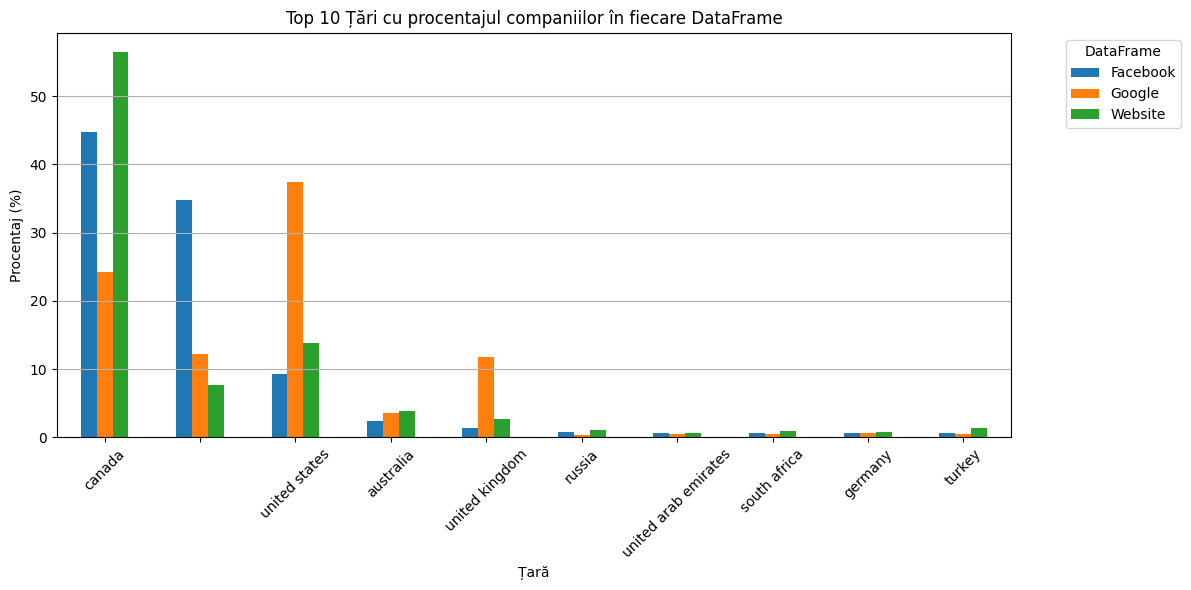

In [189]:
# Combina rezultatele intr-un singur DataFrame
combined_counts = pd.DataFrame({
    'Facebook': country_counts_df1,
    'Google': country_counts_df2,
    'Website': country_counts_df3
}).fillna(0)  # Umple cu 0 unde nu există date

# Obține top 10 țări pe baza procentajului din Facebook
top_10_countries = combined_counts.nlargest(10, 'Facebook')

# Crează graficul
top_10_countries.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Țări cu procentajul companiilor în fiecare DataFrame')
plt.xlabel('Țară')
plt.ylabel('Procentaj (%)')
plt.xticks(rotation=45)
plt.legend(title='DataFrame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

# Afișează graficul
plt.tight_layout()
plt.show()

In [190]:
region_counts_df1 = df1['region_name'].value_counts(normalize=True) * 100
region_counts_df2 = df2['region_name'].value_counts(normalize=True) * 100
region_counts_df3 = df3['region'].value_counts(normalize=True) * 100

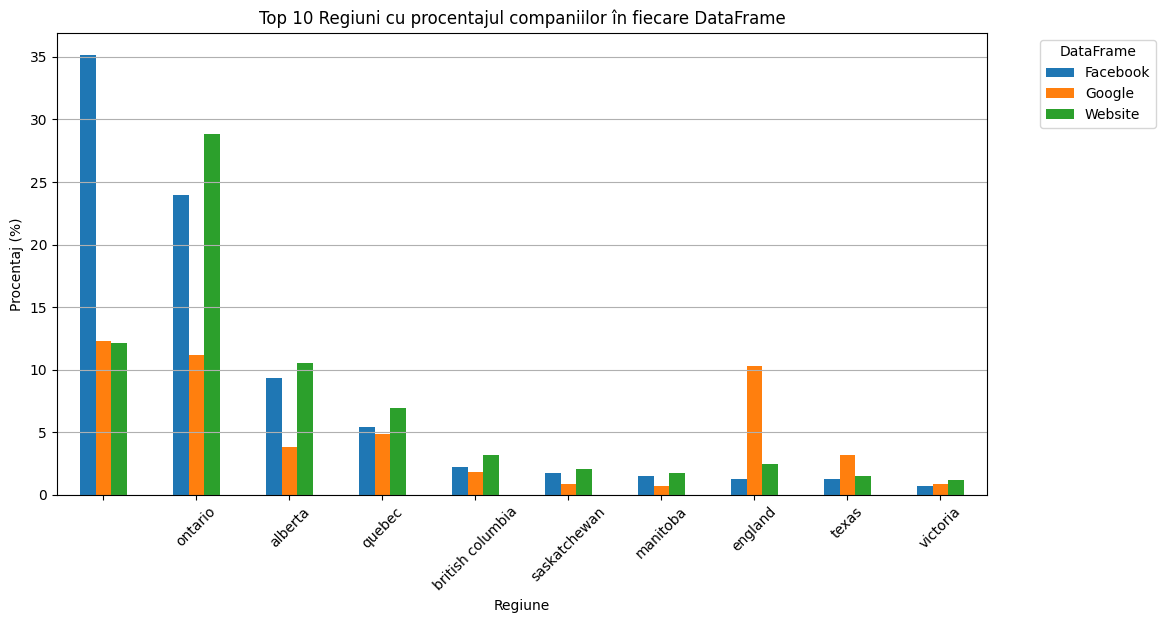

In [191]:
# Combina rezultatele intr-un singur DataFrame
combined_region_counts = pd.DataFrame({
    'Facebook': region_counts_df1,
    'Google': region_counts_df2,
    'Website': region_counts_df3
}).fillna(0)  # Umple cu 0 unde nu există date

# Obține top 10 regiuni pe baza procentajului din Facebook
top_10_regions = combined_region_counts.nlargest(10, 'Facebook')

# Crează graficul
top_10_regions.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Regiuni cu procentajul companiilor în fiecare DataFrame')
plt.xlabel('Regiune')
plt.ylabel('Procentaj (%)')
plt.xticks(rotation=45)
plt.legend(title='DataFrame', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

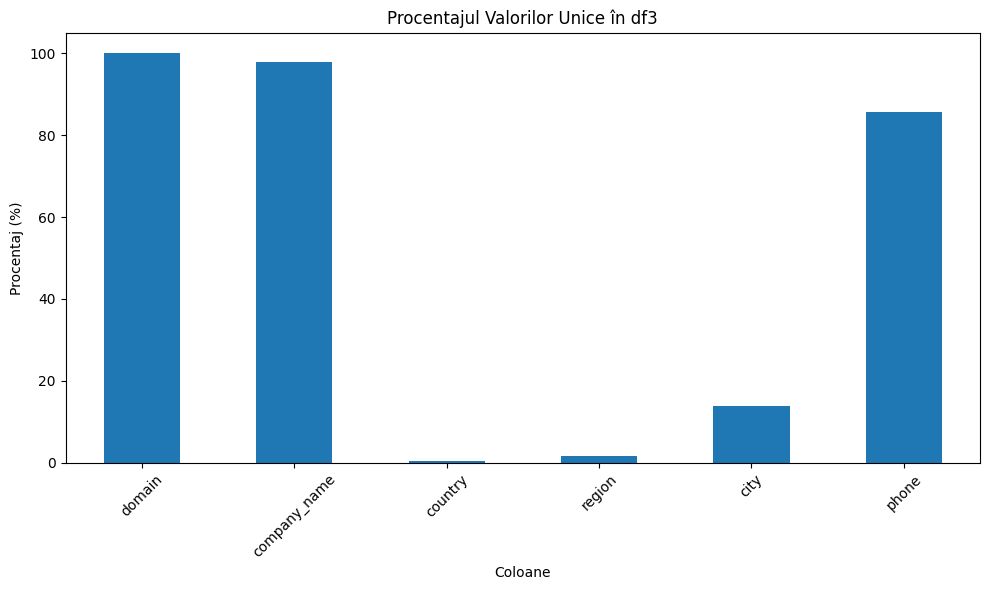

In [192]:
# Calculează procentajul valorilor unice pentru df3
unique_percentages = df3.nunique() / len(df3) * 100

# Afișează graficul
unique_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Procentajul Valorilor Unice în df3')
plt.ylabel('Procentaj (%)')
plt.xlabel('Coloane')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [140]:
df123 = df12.merge(df3, how = 'inner', on = 'company_name')

In [142]:
df123.shape

(26151, 15)

In [143]:
df123.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26151 entries, 0 to 26150
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   domain_x      26151 non-null  object
 1   domain_y      26151 non-null  object
 2   company_name  26151 non-null  object
 3   category      26151 non-null  object
 4   country_x     26151 non-null  object
 5   country_code  26151 non-null  object
 6   region_x      26151 non-null  object
 7   city_x        26151 non-null  object
 8   zip_code      26151 non-null  object
 9   phone_x       26151 non-null  object
 10  domain        26151 non-null  object
 11  country_y     26151 non-null  object
 12  region_y      26151 non-null  object
 13  city_y        26151 non-null  object
 14  phone_y       26151 non-null  object
dtypes: object(15)
memory usage: 3.0+ MB


In [144]:
df123.describe()

,domain_x,domain_y,company_name,category,country_x,country_code,region_x,city_x,zip_code,phone_x,domain,country_y,region_y,city_y,phone_y
count,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151,26151
unique,25837,25812,25837,10291,346,379,1233,5373,17840,25302,26151,114,500,4168,23434
top,"studio20.ca, studio26hotyoga.com, studio303.ca...",facebook.com,studio,,canada,ca,ontario,,,,zyara.ca,canada,ontario,,
freq,8,22,8,405,18659,19632,10368,1689,4527,534,1,17714,9288,3007,2653


In [145]:
df123.head()

,domain_x,domain_y,company_name,category,country_x,country_code,region_x,city_x,zip_code,phone_x,domain,country_y,region_y,city_y,phone_y
0,a1-abendschein.de,a1-abendschein.de,a abendschein immobilien,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,landau in der pfalz,76829,+49 634-191-80300,a1-abendschein.de,germany,rheinland-pfalz,landau,
1,abdentureclinic.ca,abdentureclinic.ca,a and b denture clinic,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424",abdentureclinic.ca,canada,alberta,edmonton,+17 804-872-876
2,handcarwashsurrey.com,handcarwashsurrey.com,a and s hand car wash,"car washes, auto services|car washes",,ca,,,,+16 049-002-121,handcarwashsurrey.com,,,,+16 049-002-121
3,andrewsroofing.ca,andrewsroofing.ca,a andrews roofing and aluminum,construction services|general contractors|home...,canada,ca,ontario,"acton, halton hills",l7j 2m1,+19 052-783-7220,andrewsroofing.ca,,,,+19 052-783-722
4,abawaterloo.com,abawaterloo.com,a balanced approach,social services & ngos,canada,ca,ontario,waterloo,n2l 6h7,+15 193-424-6660,abawaterloo.com,,,,


In [146]:
# df123['phone'] = df123.apply(lambda row: combine_phones(row['phone_x'], row['phone_y']), axis=1)

In [147]:
df123['country'] = df123.apply(lambda row: combine_columns(row, 'country_x', 'country_y'), axis=1)
df123['region'] = df123.apply(lambda row: combine_columns(row, 'region_x', 'region_y'), axis=1)
df123['city'] = df123.apply(lambda row: combine_columns(row, 'city_x', 'city_y'), axis=1)
df123['phone'] = df123.apply(lambda row: combine_columns(row, 'phone_x', 'phone_y'), axis=1)
df123['domain_xy'] = df123.apply(lambda row: combine_columns(row, 'domain_x', 'domain_y'), axis=1)
df123['domain'] = df123.apply(lambda row: combine_columns(row, 'domain_x', 'domain'), axis=1)

In [148]:
df123.head()

,domain_x,domain_y,company_name,category,country_x,country_code,region_x,city_x,zip_code,phone_x,domain,country_y,region_y,city_y,phone_y,country,region,city,phone,domain_xy
0,a1-abendschein.de,a1-abendschein.de,a abendschein immobilien,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,landau in der pfalz,76829,+49 634-191-80300,a1-abendschein.de,germany,rheinland-pfalz,landau,,germany,rheinland-pfalz,"landau, landau in der pfalz",+49 634-191-80300,a1-abendschein.de
1,abdentureclinic.ca,abdentureclinic.ca,a and b denture clinic,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424",abdentureclinic.ca,canada,alberta,edmonton,+17 804-872-876,canada,alberta,edmonton,"+17 804-872-8760, +17 804-882-424",abdentureclinic.ca
2,handcarwashsurrey.com,handcarwashsurrey.com,a and s hand car wash,"car washes, auto services|car washes",,ca,,,,+16 049-002-121,handcarwashsurrey.com,,,,+16 049-002-121,,,,+16 049-002-121,handcarwashsurrey.com
3,andrewsroofing.ca,andrewsroofing.ca,a andrews roofing and aluminum,construction services|general contractors|home...,canada,ca,ontario,"acton, halton hills",l7j 2m1,+19 052-783-7220,andrewsroofing.ca,,,,+19 052-783-722,canada,ontario,"acton, halton hills",+19 052-783-7220,andrewsroofing.ca
4,abawaterloo.com,abawaterloo.com,a balanced approach,social services & ngos,canada,ca,ontario,waterloo,n2l 6h7,+15 193-424-6660,abawaterloo.com,,,,,canada,ontario,waterloo,+15 193-424-6660,abawaterloo.com


In [149]:
df123 = df123[['domain','company_name', 'category','country', 'country_code','region', 'city','zip_code', 'phone']]

In [150]:
df123.head()

,domain,company_name,category,country,country_code,region,city,zip_code,phone
0,a1-abendschein.de,a abendschein immobilien,real estate - agents & managers|real estate - ...,germany,de,rheinland-pfalz,"landau, landau in der pfalz",76829,+49 634-191-80300
1,abdentureclinic.ca,a and b denture clinic,dentists & dental clinics,canada,ca,alberta,edmonton,t5p 3z4,"+17 804-872-8760, +17 804-882-424"
2,handcarwashsurrey.com,a and s hand car wash,"car washes, auto services|car washes",,ca,,,,+16 049-002-121
3,andrewsroofing.ca,a andrews roofing and aluminum,construction services|general contractors|home...,canada,ca,ontario,"acton, halton hills",l7j 2m1,+19 052-783-7220
4,abawaterloo.com,a balanced approach,social services & ngos,canada,ca,ontario,waterloo,n2l 6h7,+15 193-424-6660


In [151]:
df123.describe()

,domain,company_name,category,country,country_code,region,city,zip_code,phone
count,26151,26151,26151,26151,26151,26151,26151,26151,26151
unique,26067,25837,10291,591,379,2014,8146,17840,25715
top,philips.com.tr,studio,,canada,ca,ontario,calgary,,
freq,4,8,405,18942,19632,10104,1297,4527,328


In [152]:
procentdf123 = df123.nunique() / len(df123) * 100

In [153]:
print(procentdf123)

domain          99.678789
company_name    98.799281
category        39.352224
country          2.259952
country_code     1.449275
region           7.701426
city            31.149860
zip_code        68.219189
phone           98.332760
dtype: float64


In [154]:
country_counts = df123['country'].value_counts()

In [155]:
country_counts = country_counts[country_counts > 500]

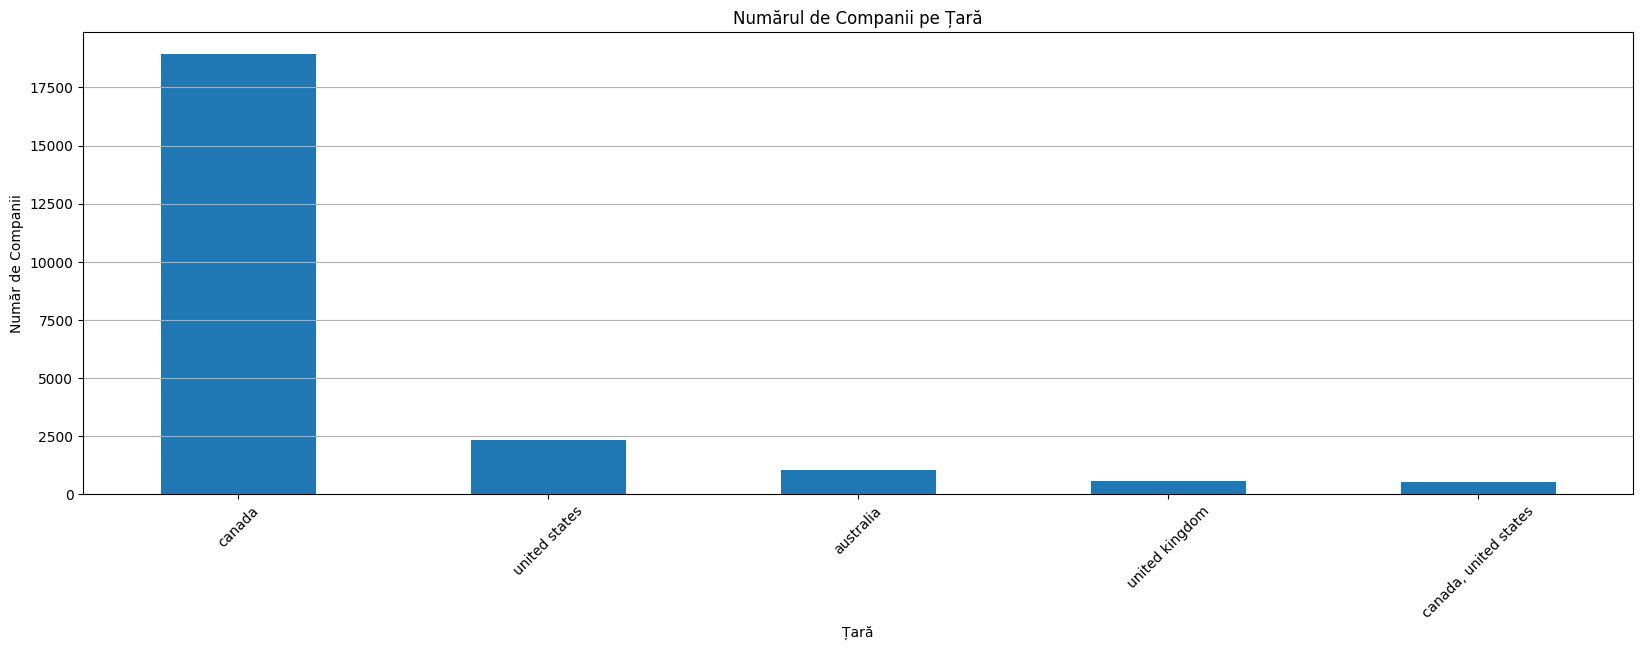

In [156]:
# Crearea plotului
plt.figure(figsize=(20, 6))
country_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Țară')
plt.xlabel('Țară')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [157]:
city_counts = df123['city'].value_counts()

In [158]:
city_counts = city_counts[city_counts > 500] # verificam tarile cu > 500 companii/tara

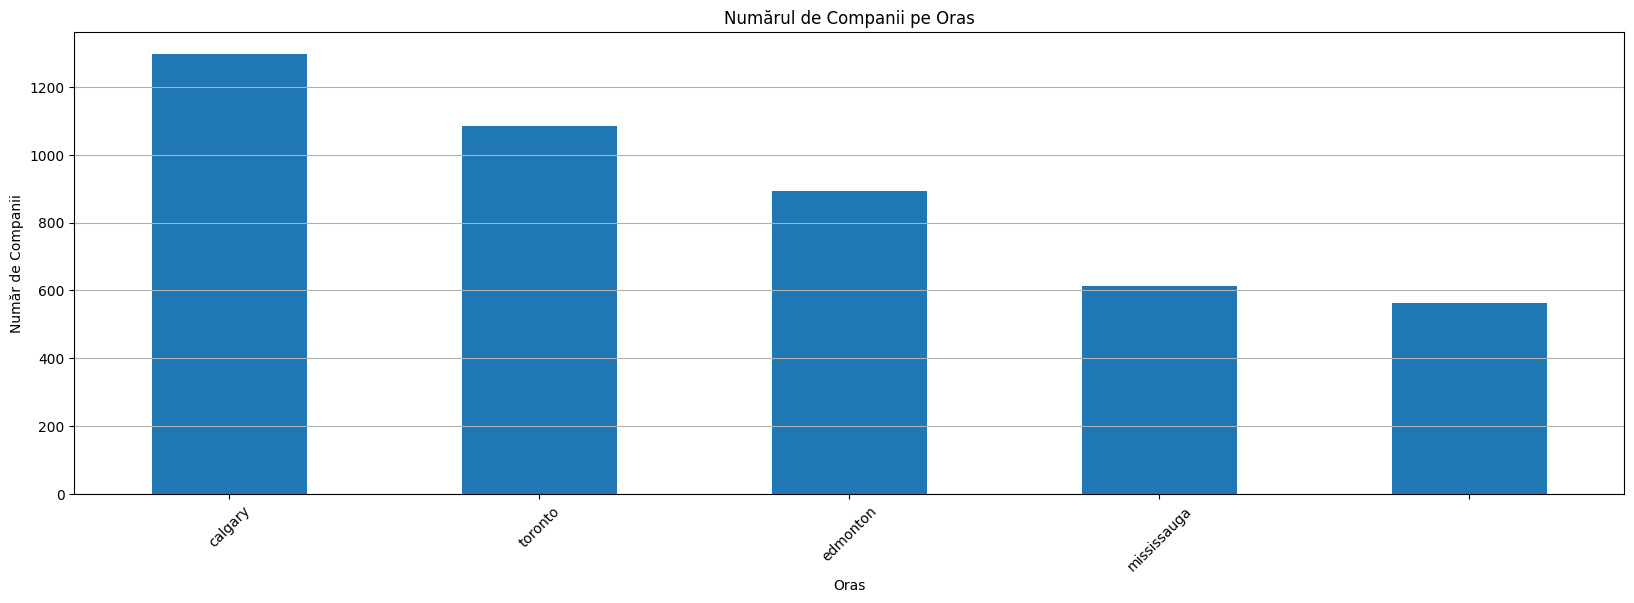

In [159]:
# Crearea plotului
plt.figure(figsize=(20, 6))
city_counts.plot(kind='bar')
plt.title('Numărul de Companii pe Oras')
plt.xlabel('Oras')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afișarea plotului
plt.show()

In [160]:
duplicates = df123[df123.duplicated(subset='company_name', keep=False)]

In [161]:
print(duplicates)

                                               domain  \
41                     a1towinginc.ca, valleysheds.ca   
42                                     a1towinginc.ca   
52            aaasteamcarpetcleaning.ca, aaa-clean.ca   
53            aaasteamcarpetcleaning.ca, aaa-clean.ca   
120                                  alsnswact.org.au   
...                                               ...   
25785  woodlandspri.moe.edu.sg, woodlandsps.wa.edu.au   
25896                 xerox.ru, documentxcellence.com   
25897                                        xerox.ru   
26136             bridgepointeducation.com, zovio.com   
26137                                       zovio.com   

                    company_name  \
41                      a towing   
42                      a towing   
52     aaa steam carpet cleaning   
53     aaa steam carpet cleaning   
120     aboriginal legal service   
...                          ...   
25785   woodlands primary school   
25896                      

In [162]:
df123 = df123.groupby('company_name').agg({
    'domain': 'first',  # Presupunem că țara e aceeași
    'category': lambda x: ', '.join(set(', '.join(x).split(', '))),
    'country': 'first',  # Presupunem că țara e aceeași
    'country_code': 'first',  # Presupunem că codul de țară e același
    'region': lambda x: ', '.join(set(x.dropna())),  # Combinăm regiunile
    'city': lambda x: ', '.join(set(x.dropna())),  # Combinăm orașele
    'zip_code': lambda x: ', '.join(set(x.dropna())),  # Combinăm codurile poștale
    'phone': lambda x: ', '.join(set(', '.join(x).split(', ')))  # Combinăm numerele de telefon
}).reset_index()

In [163]:
df123.shape

(25837, 9)

In [164]:
def combine_unique_values(series):
    return ', '.join(set(series.split(', ')))

In [165]:
df123['city'] = df123['city'].apply(combine_unique_values)
df123['zip_code'] = df123['zip_code'].apply(combine_unique_values)
df123['category'] = df123['category'].apply(combine_unique_values)

In [166]:
def combine_categories(category_column):
    # Verificăm dacă avem un string valid
    if not isinstance(category_column, str):
        return ''
    
    # Împărțim categoriile pe baza delimitatorilor: virgule și bare verticale
    categories = re.split(r'[|,]', category_column)
    
    # Eliminăm spațiile în exces și categoriile duplicate
    unique_categories = list(dict.fromkeys([cat.strip() for cat in categories]))
    
    # Combinăm categoriile unice într-un singur string, separate prin '|'
    return ' | '.join(unique_categories)


In [167]:
df123['category'] = df123['category'].apply(combine_categories)

In [168]:
def combine_phone_numbers(phones):
    phone_list = [num.strip() for num in phones.split(',')]
    unique_phone_numbers = []
    
    while phone_list:
        current = phone_list.pop(0)
        similar_numbers = [current]

        for number in phone_list[:]:
            if fuzz.ratio(current, number) > 80:
                similar_numbers.append(number)
                phone_list.remove(number)

        # Alegem numărul cel mai lung
        longest_number = max(similar_numbers, key=len)
        unique_phone_numbers.append(longest_number)
    
    return ', '.join(unique_phone_numbers)

In [169]:
df123['phone'] = df123['phone'].apply(combine_phone_numbers)

In [170]:
df123['address'] = df123[['country', 'country_code', 'region', 'city', 'zip_code']].fillna('').agg(', '.join, axis=1)

In [171]:
df123 = df123[['domain','company_name', 'category','address', 'phone']]

In [172]:
df123.head()

,domain,company_name,category,address,phone
0,a1-abendschein.de,a abendschein immobilien,real estate - agents & managers,"germany, de, rheinland-pfalz, landau, landau i...",+49 634-191-80300
1,abdentureclinic.ca,a and b denture clinic,dentists & dental clinics,"canada, ca, alberta, edmonton, t5p 3z4","+17 804-872-8760, +17 804-882-424"
2,handcarwashsurrey.com,a and s hand car wash,car washes | auto services,", ca, , ,",+16 049-002-121
3,andrewsroofing.ca,a andrews roofing and aluminum,construction services | general contractors | ...,"canada, ca, ontario, acton, halton hills, l7j 2m1",+19 052-783-7220
4,abawaterloo.com,a balanced approach,social services & ngos,"canada, ca, ontario, waterloo, n2l 6h7",+15 193-424-6660


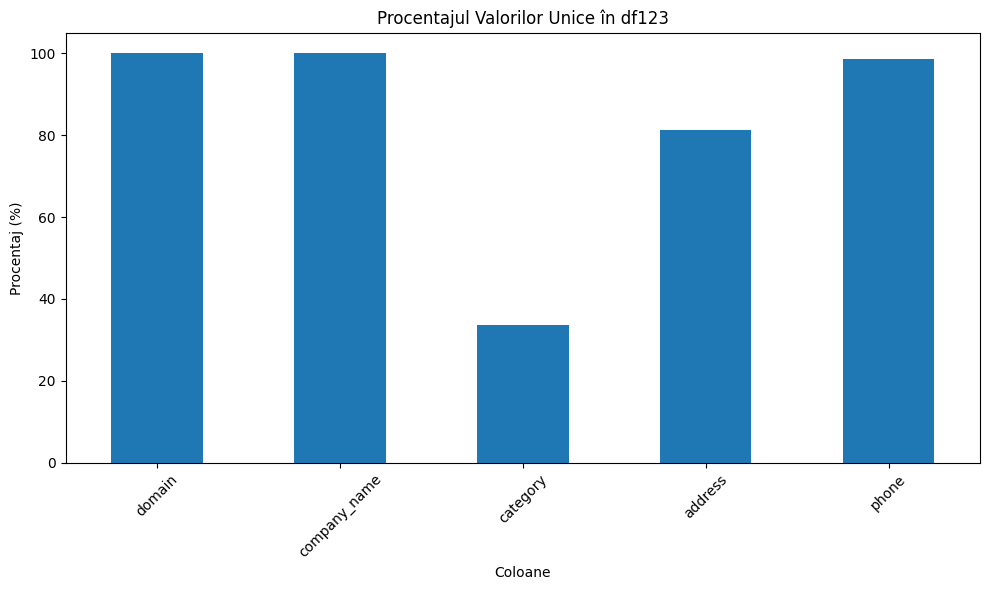

In [173]:
# Calculează procentajul valorilor unice pentru df123
unique_percentages = df123.nunique() / len(df123) * 100

# Afișează graficul
unique_percentages.plot(kind='bar', figsize=(10, 6))
plt.title('Procentajul Valorilor Unice în df123')
plt.ylabel('Procentaj (%)')
plt.xlabel('Coloane')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [174]:
df1.columns

Index(['domain', 'address', 'category', 'country_name', 'country_code',
       'region_name', 'city', 'zip_code', 'company_name', 'phone'],
      dtype='object')

In [175]:
df2.columns

Index(['domain', 'address', 'category', 'country_name', 'country_code',
       'region_name', 'city', 'zip_code', 'company_name', 'phone'],
      dtype='object')

In [176]:
df3.columns

Index(['domain', 'company_name', 'country', 'region', 'city', 'phone'], dtype='object')

In [181]:
df123 = df123[['company_name', 'category','address', 'phone']]

In [182]:
top_10_categories = df123['category'].value_counts().head(10)

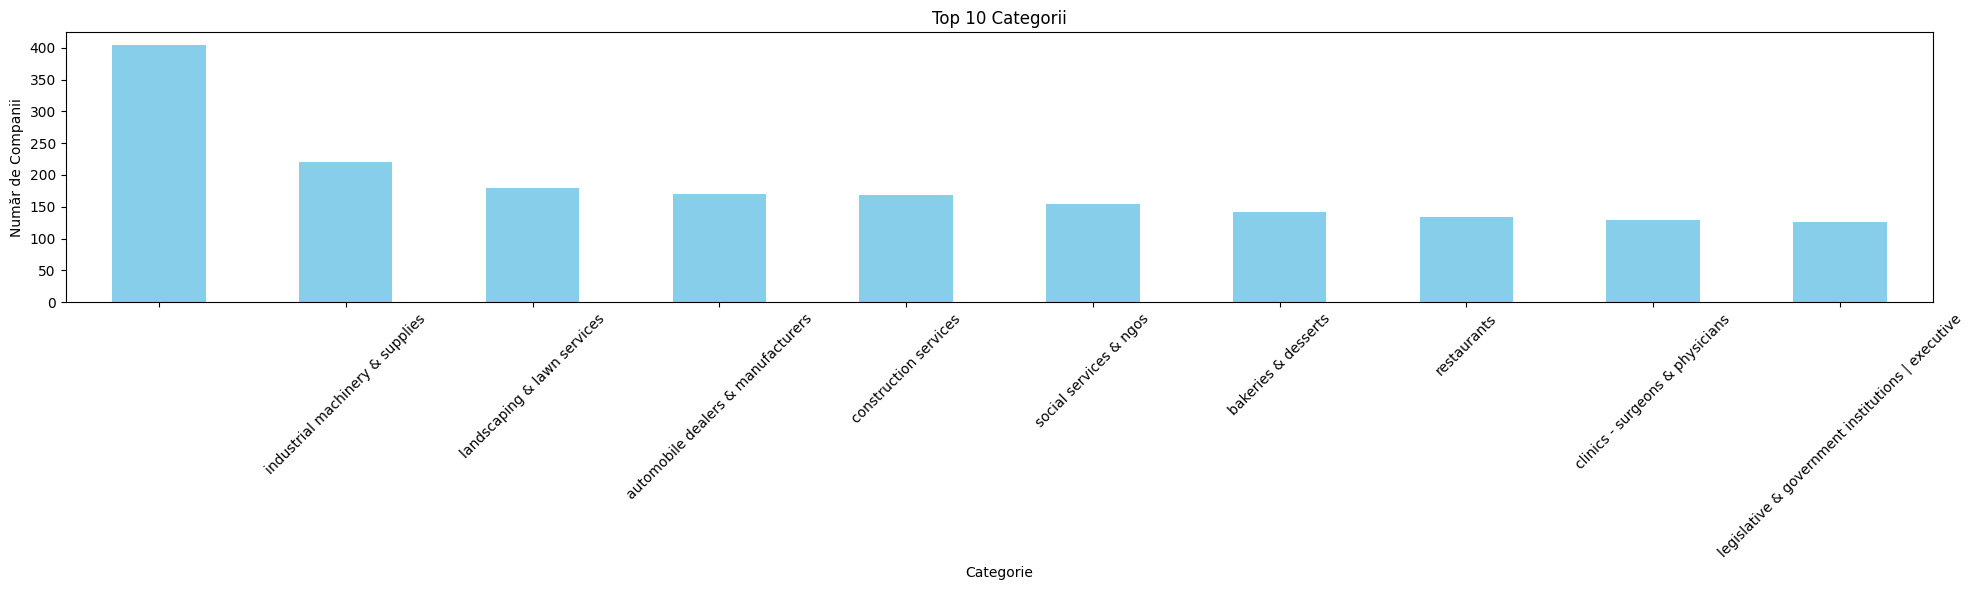

In [183]:
plt.figure(figsize=(20, 6))
top_10_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorii')
plt.xlabel('Categorie')
plt.ylabel('Număr de Companii')
plt.xticks(rotation=45)  # Rotire etichete pe axa x pentru o mai bună lizibilitate
plt.tight_layout()  # Ajustarea layout-ului
plt.show()

In [184]:
percentage_non_valid = ((df123.notna() & (df123 != '')).sum() / len(df123)) * 100

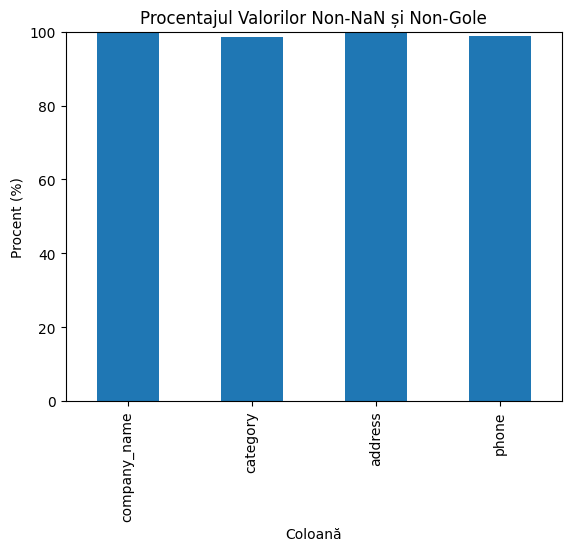

In [185]:
percentage_non_valid.plot(kind='bar')
plt.title('Procentajul Valorilor Non-NaN și Non-Gole')
plt.xlabel('Coloană')
plt.ylabel('Procent (%)')
plt.ylim(0, 100)
plt.show()

In [186]:
df12['country'].value_counts().sum()

np.int64(41899)

In [187]:
df123.to_csv('final_output.csv', index=False)